In [2]:
import keras as kr
import numpy as np
import tensorflow as tf
import pandas as pd

Using TensorFlow backend.


In [3]:
kr.__version__

'2.3.1'

In [4]:
#data = pd.read_csv("CALQ_output.csv")  ## small  6k file
data = pd.read_csv("CALQ_output_10x.csv",nrows=50000)  ## small  6k file
#inputdata = data.values

In [5]:
data

,CALQ_0,CALQ_1,CALQ_2,CALQ_3,CALQ_4,CALQ_5,CALQ_6,CALQ_7,CALQ_8,CALQ_9,...,CALQ_38,CALQ_39,CALQ_40,CALQ_41,CALQ_42,CALQ_43,CALQ_44,CALQ_45,CALQ_46,CALQ_47
0,104,76,7,51,224,42,29,54,60,244,...,0,0,0,0,0,0,0,0,0,0
1,203,49,0,0,125,120,64,0,64,104,...,0,0,0,0,0,0,0,0,0,0
2,224,45,68,62,132,116,36,58,69,61,...,53,0,32,80,7,0,20,6,0,0
3,0,0,0,0,0,0,0,254,3,23,...,0,0,109,3,0,0,146,5,0,0
4,0,0,4,9,0,35,60,32,26,11,...,129,61,576,183,218,110,26,184,146,139
5,0,0,0,0,0,0,0,0,0,0,...,154,0,39,48,25,4,206,172,91,203
6,0,0,0,5,0,0,0,36,0,0,...,109,65,2,153,168,84,97,161,26,89
7,0,0,0,0,0,0,0,0,0,0,...,0,4,44,12,43,123,51,180,64,80
8,30,32,19,29,0,0,0,0,0,0,...,80,25,4,122,36,90,103,58,26,40
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,65


In [140]:
STC16 = pd.DataFrame()
STC4 = pd.DataFrame()
a= np.array(range(0,48))
STC16_0=['CALQ_%i'%i for i in range(0,16)]
STC16_1=['CALQ_%i'%i for i in range(16,32)]
STC16_2=['CALQ_%i'%i for i in range(32,48)]
STC16['STC_0'] = data[STC16_0].sum(axis=1)
STC16['STC_1'] = data[STC16_1].sum(axis=1)
STC16['STC_2'] = data[STC16_2].sum(axis=1)
for i in range(len(a.reshape(12,4))):
    colname = 'STC_%i'%i
    colnamelist =['CALQ_%i'%j for j in a.reshape(12,4)[i]]
    STC4[colname] = data[colnamelist].sum(axis=1)

In [6]:
normData = data.apply(lambda x: x/max(x),axis=1)
inputdata = normData.values


In [7]:
#trim the training data to speed up
#Nmax = 50000
#inputdata = inputdata[1:Nmax]
#inputdata = normData.values
len(inputdata)

298458

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_dim    = 48

# this is our input placeholder
# input_img = Input(shape=(input_dim,))
# # "encoded" is the encoded representation of the input
# encoded = Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = Dense(input_dim, activation='sigmoid')(encoded)


# "encoded" is the encoded representation of the input
input_img = Input(shape=(input_dim,))
encoded = Dense(24, activation='relu')(input_img)
encoded = Dense(12, activation='relu')(encoded)
encoded = Dense(6, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(24, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                84  

In [9]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
Total params: 1,582
Trainable params: 1,582
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
#autoencoder.compile(optimizer='adadelta', loss='mse')

In [11]:
validation_frac = 0.2
N = round(len(inputdata)*validation_frac)

#randomly select 25% entries
index = np.random.choice(inputdata.shape[0], N, replace=False)  
#select the indices of the other 75%
full_index = np.array(range(0,len(inputdata)))
train_index = np.logical_not(np.in1d(full_index,index))

val_input = inputdata[index]
train_input = inputdata[train_index]

In [12]:
es = kr.callbacks.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = autoencoder.fit(train_input,train_input,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(val_input,val_input),
                callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 41us/step - loss: 0.4654 - val_loss: 0.2714
Epoch 2/100
40000/40000 [==============================] - 1s 19us/step - loss: 0.2685 - val_loss: 0.2664
Epoch 3/100
40000/40000 [==============================] - 1s 30us/step - loss: 0.2669 - val_loss: 0.2658
Epoch 4/100
40000/40000 [==============================] - 1s 21us/step - loss: 0.2666 - val_loss: 0.2656
Epoch 5/100
40000/40000 [==============================] - 1s 19us/step - loss: 0.2665 - val_loss: 0.2655
Epoch 6/100
40000/40000 [==============================] - 1s 20us/step - loss: 0.2664 - val_loss: 0.2655
Epoch 7/100
40000/40000 [==============================] - 1s 22us/step - loss: 0.2664 - val_loss: 0.2654
Epoch 8/100
40000/40000 [==============================] - 1s 25us/step - loss: 0.2663 - val_loss: 0.2654
Epoch 9/100
40000/40000 [=============================

40000/40000 [==============================] - 1s 15us/step - loss: 0.2443 - val_loss: 0.2430
Epoch 75/100
40000/40000 [==============================] - 1s 14us/step - loss: 0.2442 - val_loss: 0.2429
Epoch 76/100
40000/40000 [==============================] - 1s 15us/step - loss: 0.2440 - val_loss: 0.2428
Epoch 77/100
40000/40000 [==============================] - 1s 15us/step - loss: 0.2439 - val_loss: 0.2428
Epoch 78/100
40000/40000 [==============================] - 1s 15us/step - loss: 0.2438 - val_loss: 0.2426
Epoch 79/100
40000/40000 [==============================] - 1s 15us/step - loss: 0.2437 - val_loss: 0.2425
Epoch 80/100
40000/40000 [==============================] - 1s 15us/step - loss: 0.2435 - val_loss: 0.2424
Epoch 81/100
40000/40000 [==============================] - 1s 15us/step - loss: 0.2434 - val_loss: 0.2423
Epoch 82/100
40000/40000 [==============================] - 1s 14us/step - loss: 0.2433 - val_loss: 0.2420
Epoch 83/100
40000/40000 [========================

In [71]:
Layers = 'Layers_48-24-12-10-10-10-4'

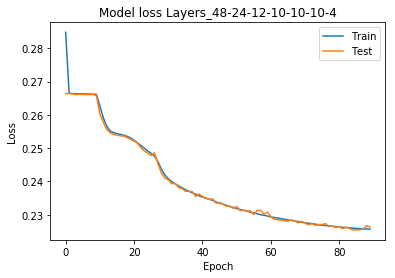

In [72]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss %s'%Layers)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig("history_%s.jpg"%Layers)
plt.show()

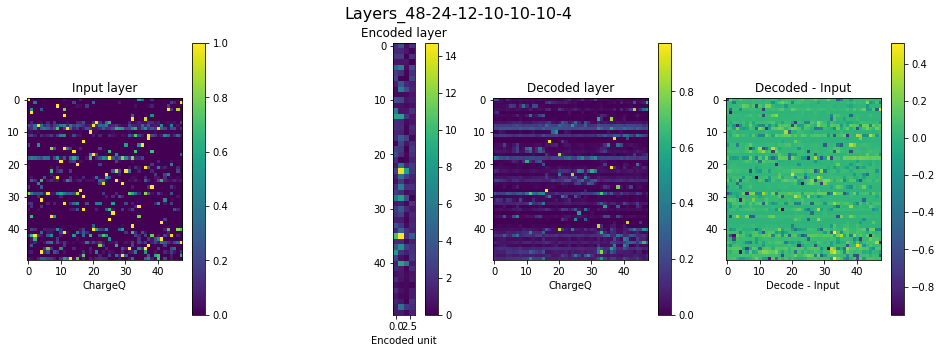

In [75]:
# encode and decode some digits
# note that we take them from the *test* set

x = val_input

encoded_Q = encoder.predict(x)
decoded_Q = autoencoder.predict(x)


Nevents = 50
index = np.random.choice(encoded_Q.shape[0], Nevents, replace=False)  

fig, axs = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle(Layers,fontsize=16)

axs[0].set(xlabel='ChargeQ',title='Input layer')
axs[1].set(xlabel='Encoded unit',title='Encoded layer')
axs[2].set(xlabel='ChargeQ'     ,title='Decoded layer')
axs[3].set(xlabel='Decode - Input',title='Decoded - Input')
c1=axs[0].imshow(x[index])
c2=axs[1].imshow(encoded_Q[index])
c3=axs[2].imshow(decoded_Q[index])
c4=axs[3].imshow(decoded_Q[index]-x[index])
plt.colorbar(c1,ax=axs[0])
plt.colorbar(c2,ax=axs[1])
plt.colorbar(c3,ax=axs[2])
plt.colorbar(c4,ax=axs[3])
plt.savefig("encoded_%s.jpg"%Layers)

plt.show()


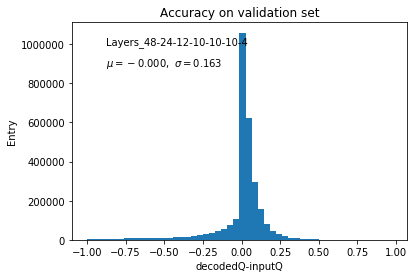

mu=-0.000 S.D.= 0.163, ave(PSNR) = 17.526  S.D(PSNR) = 5.454


In [77]:
#y = (decoded_Q[index]-x[index]).flatten()
y = (decoded_Q-x).flatten()
mu = np.mean(y)
std = np.std(y)
mse = np.sum((decoded_Q-x)**2,1)/48
PSNR = 10*np.log10(1/mse)

plt.hist(y,50)

ax = plt.axes()
plt.text(0.1, 0.9, Layers,transform=ax.transAxes)
plt.text(0.1, 0.8, r'$\mu=%.3f,\ \sigma=%.3f$'%(mu,std),transform=ax.transAxes)
plt.xlabel('decodedQ-inputQ')
plt.ylabel('Entry')
plt.title('Accuracy on validation set')
plt.savefig("hist_%s.jpg"%Layers)
plt.show()
print('mu=%.3f'%mu,'S.D.= %.3f, ave(PSNR) = %.3f  S.D(PSNR) = %.3f'%(std,PSNR.mean(),PSNR.std()))

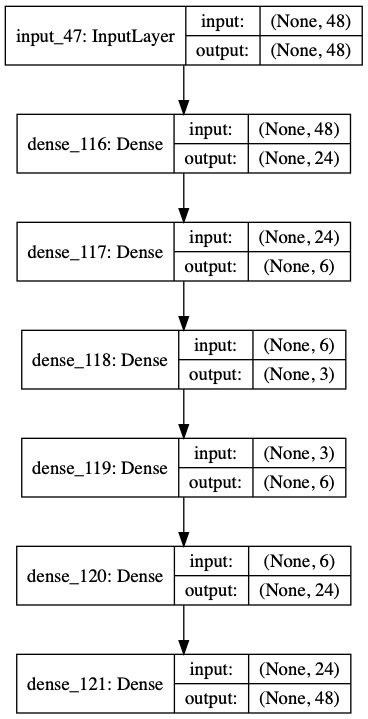

In [517]:
from keras.utils import plot_model
plot_model(autoencoder, show_shapes=True,to_file='model.jpeg')

In [535]:
from keras.models import model_from_json

json_string = encoder.to_json()
with open('./encoder_model.json','w') as f:
    f.write(json_string)
encoder.save_weights('encoder_%s.hdf5'%Layers)

In [14]:
summary = pd.DataFrame(columns=['name','corr','ssd'])

In [18]:
summary.append({}'name':'deepAutos_48_24_12_6',0.539,1.27],ignore_index=True)

,0,corr,name,ssd
0,deepAutos_48_24_12_6,NaN,NaN,NaN
1,0.539,NaN,NaN,NaN
2,1.27,NaN,NaN,NaN


In [27]:
summary = summary.append({'name':'1','corr':0,'ssd':1},ignore_index=True)

In [28]:
summary

,name,corr,ssd
0,1,0,1
